In [22]:
# DEPENDENCIES AND SETUP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import databaseconfig as cfg


In [23]:
# Connecting jupyter notebook with PGadmin server

from sqlalchemy import create_engine
engine = create_engine('postgresql://' + cfg.postgresql['user'] + ':' + cfg.postgresql['password']
                       + '@' + cfg.postgresql['host'] + ':5432/' + cfg.postgresql['db'])

connection = engine.connect()



In [24]:
# Using select query, finding "average salary by title" from the table "titles" and from table "salaries"
# Group by titles
# Join based on "emp_no"


query_avg_salary_by_title = '''
SELECT titles.title, ROUND(AVG(salaries.salary),2) AS "average_salary"
FROM titles
JOIN salaries
ON titles.emp_no = salaries.emp_no
GROUP BY title;
'''


In [25]:
# Reading sql query

average_salary_by_title =pd.read_sql(query_avg_salary_by_title,engine)
average_salary_by_title

#print(type(average_salary_by_title))

,title,average_salary
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


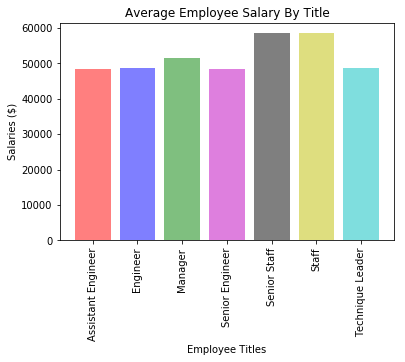

In [26]:
# Creating bar chart of average salary by title


x_axis = average_salary_by_title["title"]
y_axis = average_salary_by_title["average_salary"]
ticks = np.arange(len(x_axis))


plt.bar(x_axis, y_axis, align="center", alpha=0.5, color=["r", "b", "g", "m", "k", "y", "c"])
plt.xticks(ticks, x_axis, rotation="vertical")

# Set Labels & Title
plt.ylabel("Salaries ($)")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary By Title")

# Save Figure
plt.savefig("../average_salary_by_title.png",bbox_inches="tight")

# Show plot
plt.show()


### TECHNICAL REPORT OUTLINING DATA ENGINEERING STEPS TAKEN


Sketched out Entity Relationship Diagram (ERD) of tables based on the csv files provided; specifying data types, primary keys and foreign keys.
Exported ERD to PostgreSQL thus creating table schemas and constraints for each of the six CSV files.
Imported CSV files to each corresponding SQL table.